In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys

import datacube
from odc.ui import DcViewer

import numpy as np
import xarray as xr
import pandas as pd
import pickle

sys.path.insert(1, "/home/jovyan/code/dea-notebooks/Tools")

from dea_tools.plotting import rgb, display_map
from datacube.utils.cog import write_cog
from matplotlib import colors as mcolours

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", None)

dc = datacube.Datacube(app="cyclone mangroves")


In [83]:
products = dc.list_products()
products

,name,description,license,default_crs,default_resolution
name,,,,,
aster_aloh_group_composition,aster_aloh_group_composition,ASTER,None,None,None
aster_aloh_group_content,aster_aloh_group_content,ASTER,None,None,None
aster_false_colour,aster_false_colour,ASTER,None,None,None
aster_feoh_group_content,aster_feoh_group_content,ASTER,None,None,None
aster_ferric_oxide_composition,aster_ferric_oxide_composition,ASTER,None,None,None
aster_ferric_oxide_content,aster_ferric_oxide_content,ASTER,None,None,None
aster_ferrous_iron_content_in_mgoh,aster_ferrous_iron_content_in_mgoh,ASTER,None,None,None
aster_ferrous_iron_index,aster_ferrous_iron_index,ASTER,None,None,None
aster_green_vegetation,aster_green_vegetation,ASTER,None,None,None


In [71]:
product = "ga_ls_mangrove_cover_cyear_3"
# product = 'mangrove_cover'
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,spectral_definition
measurement,,,,,,,
canopy_cover_class,canopy_cover_class,uint8,1,255,NaN,"{'woodland': {'bits': [0, 1, 2, 3, 4, 5, 6, 7], 'values': {'1': True}, 'description': 'Woodland'}, 'notobserved': {'bits': [0, 1, 2, 3, 4, 5, 6, 7], 'values': {'0': True}, 'description': 'Mangrove...",NaN


In [17]:
# Minnamurra
site = 'Minnamurra'
lat = -34.6263
lon = 150.8531
lat_buffer = 0.015
lon_buffer = 0.015

In [18]:
# Combine central coordinates with buffer values to create the latitude and longitude range for the analysis
lat_range = (lat - lat_buffer, lat + lat_buffer)
lon_range = (lon - lon_buffer, lon + lon_buffer)

# Set the range of dates for the analysis
time_range = ("2015", "2015")

display_map(x=lon_range, y=lat_range)

In [19]:
# Create the 'query' dictionary object, which contains the longitudes, latitudes and time defined above
res = (-25, 25)

query = {
    "y": lat_range,
    "x": lon_range,
    "time": time_range,
    'resolution':res}

In [80]:
# load in mangrove cover
DEAmangrove = dc.load(product = 'ga_ls_mangrove_cover_cyear_3', output_crs="EPSG:3577", **query)


In [81]:
DEAmangrove

<xarray.Dataset>
Dimensions:             (time: 1, y: 149, x: 129)
Coordinates:
  * time                (time) datetime64[ns] 2015-07-02T11:59:59.999999
  * y                   (y) float64 -3.906e+06 -3.906e+06 ... -3.909e+06
  * x                   (x) float64 1.715e+06 1.715e+06 ... 1.718e+06 1.718e+06
    spatial_ref         int32 3577
Data variables:
    canopy_cover_class  (time, y, x) uint8 255 255 255 255 ... 255 255 255 255
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [24]:
mangrove_cc = DEAmangrove.canopy_cover_class

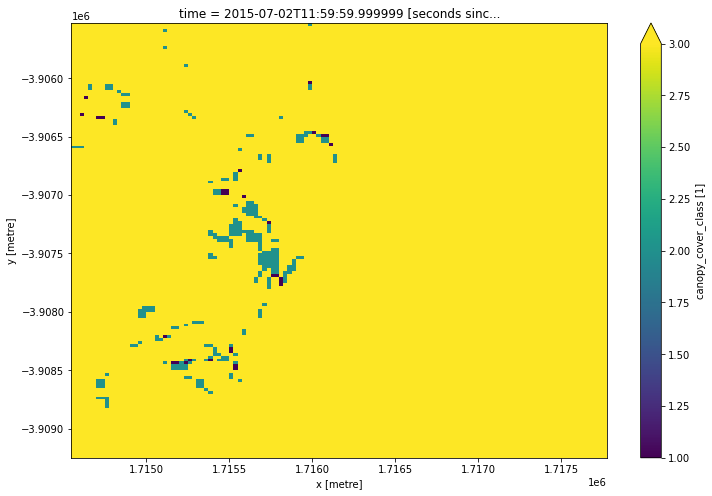

In [66]:
mangrove_cc.plot(vmax = 3, figsize=(12,8))

In [49]:
# # Define a colour scheme for the Level 3
# mangrove_COLOUR_SCHEME = {
#     255: (255, 255, 255, 255, "No Data"),
#     1: (172, 188, 45, 255, "Cultivated terrestrial vegetation"),
#     2: (14, 121, 18, 255, "Natural terrestrial vegetation"),
#     3: (30, 191, 121, 255, "Natural aquatic vegetation"),
# }

In [64]:
# Plot layer from colour map
# def plot_layer(colours, data):
#     colour_arr = []
#     cblabels = []
#     for key, value in colours.items():
#         colour_arr.append(np.array(value[:-2]) / 255)
#         cblabels.append(value[-1])

#     cmap = mcolours.ListedColormap(colour_arr)
#     bounds = list(colours)
#     bounds.append(255)
#     norm = mcolours.BoundaryNorm(np.array(bounds) - 0.1, cmap.N)

#     # Plot the provided layer
#     im = data.plot(
#         cmap=cmap, norm=norm, add_colorbar=True, col="time", size=5
#     )

#     cb = im.cbar
#     ticks = cb.get_ticks()
#     cb.set_ticks(ticks + np.diff(ticks, append=256) / 2)
#     cb.set_ticklabels(cblabels)

#     return im

In [67]:
# plot_layer(mangrove_COLOUR_SCHEME, DEAmangrove.canopy_cover_class)

#### load in pickle example

In [74]:
cyclone_name = {
    'Ingrid_Landfall2':'IngridLF2', #the key is the file name of windspeed, the value is the cyclone name
    'Laurence':'Laurence',
    'Lam':'Lam',
    'Ita':  'Ita',
    'Monica_Landfall1':'MonicaLF1',
    'Nathan_Landfall2':'NathanLF2',
    'Marcia': 'Marcia',
    'Nathan_Landfall1':'NathanLF1',
    'Ingrid_Landfall1': 'IngridLF1',
    'George':'George',
    'Larry':'Larry',
    'Yas':'Yasi',
    'Ingrid_Landfall3':'IngridLF3',
    'Monica_Landfall2':'MonicaLF2'
}

# fname = dir_name + cname+'_tally.pkl'
fname = 'Yasi_tally.pkl'

print("load tables", fname)
with open(fname, 'rb') as f:
    wind_cat_full, all_wind_cat_full = pickle.load(f)

load tables Yasi_tally.pkl


In [79]:
wind_cat_full

,0,1,2,3,4
C1,6.00875,1.560625,0.006875,0.035,0.0375
C2,4.735625,1.01375,0.00125,0.005,0.031875
C3,64.60875,33.115,0.904375,0.216875,0.601875
C4,80.4475,138.90125,32.875625,0.30875,3.6925
C5,0.443125,2.80375,3.455,0.033125,1.36375
